<a href="https://colab.research.google.com/github/Pki03/ML/blob/main/5_Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

now we learn support vector regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values#always remember to add values
Y=dataset.iloc[:,-1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(Y)#we will also have to convert Y to 2d array

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


converting Y to 2d array

In [ ]:
Y=Y.reshape(len(Y),1)#len(Y) means 10 rows and 1 means 1 column

In [ ]:
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
sc_Y=StandardScaler()
Y=sc_Y.fit_transform(Y)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training SVR on dataset

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

applying inverse scaling transformation and predicting a new result

In [ ]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

visualising svr results

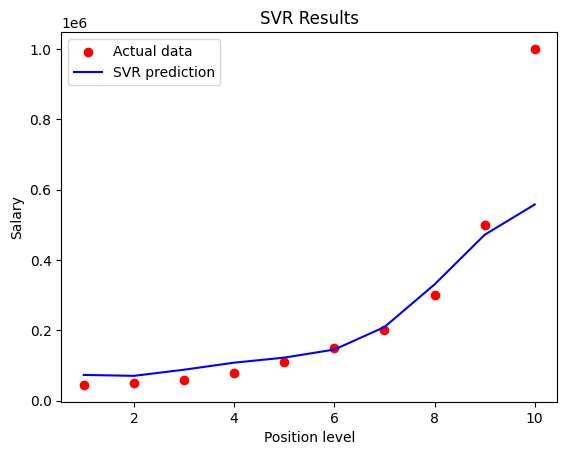

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color='red', label='Actual data')  # Scatter plot of original data
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue', label='SVR prediction')  # SVR prediction line
plt.title('SVR Results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

for higher resolution